# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from scipy.optimize import fmin
import torch
import os, glob

from indentation.indentationset import IndentationSet
from indentation.processing.find_contact import findContact_minimum, findContact_blackMagic, findContact_blackMagic_CNN
from indentation.processing.signal import do_nothing, crop_start, crop_afm_temp
from indentation.processing.calculate_parameters import parameter_youngs_modulus
from indentation.processing.plotting import plot_curve_parameters_bar, plot_instance_parameters_bar, plot_mean_force_curves
from indentation.ml.models import ConvClassifier_1, ConvClassifier_2

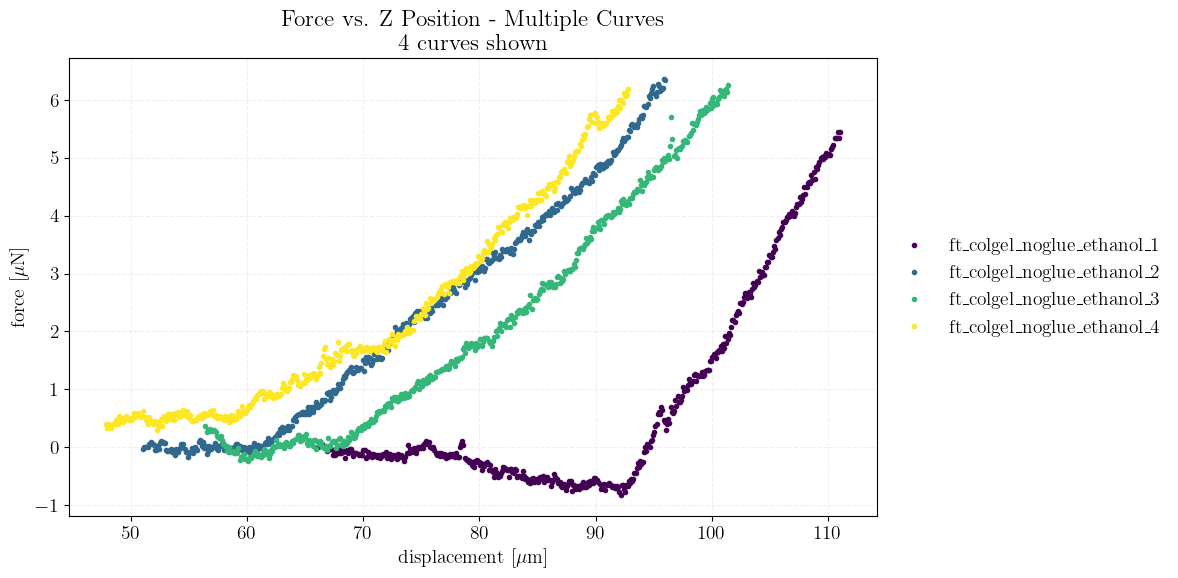

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n4 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [3]:
path = r"E:\Group\File_Exchange\Raoul_Paula\2024_12_06\ft_colgel_noglue1\ft_colgel_noglue_ethanol.dat"
ft = IndentationSet(path, exp_type="ft")

ft.plot_all_raw(linestyle="")

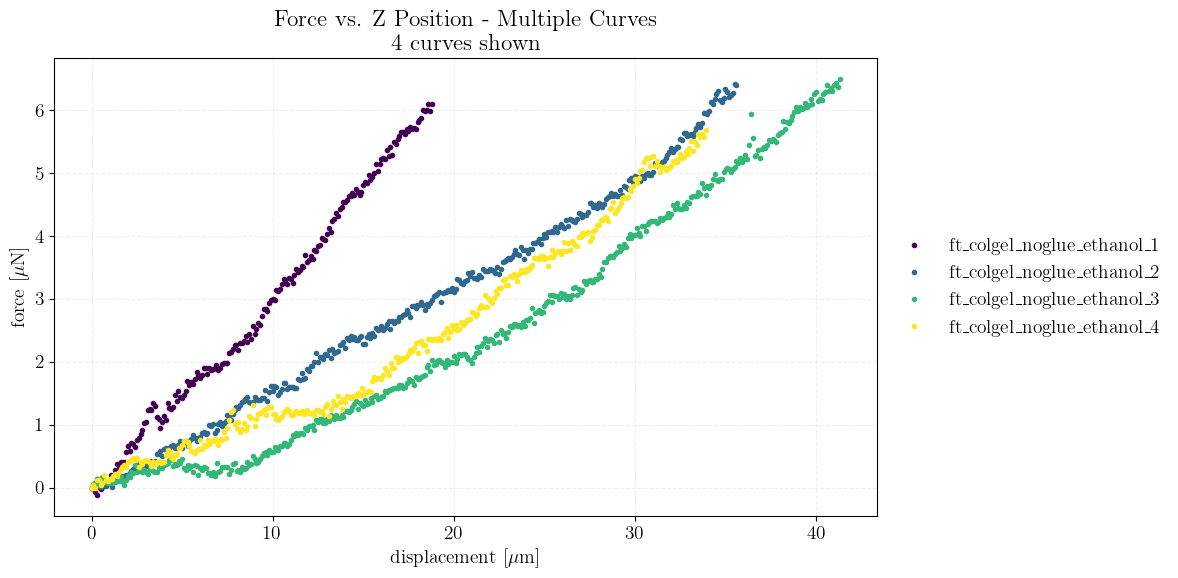

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n4 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [7]:
processing_pl = [findContact_blackMagic]

ft.process_raw(processing_pl)
ft.plot_all(linestyle="")

Mean and std: 2.5416279773871673 1.5529692255102852


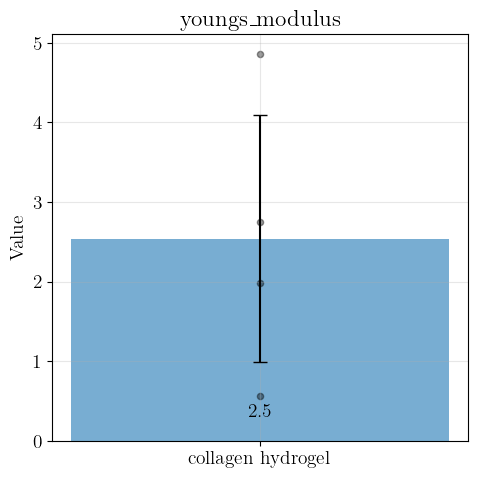

In [8]:
function_arguments = dict(radius=100, nu=0.5, cutoff=10, keyname="youngs_modulus")
ft.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)
plot_curve_parameters_bar(ft, 
                          parameter_names=['youngs_modulus'],
                          labels=['collagen hydrogel'],
                          figsize=(5,5))